# Homework_3 : California Housing Price Prediction

> Note: sometimes your answer doesn't match one of the options exactly. That's fine. 
Select the option that's closest to your solution.

### Dataset

In this homework, we will use the California Housing Prices data from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```
We'll keep working with the `'median_house_value'` variable, and we'll transform it to a classification task. 
 

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`,
* `'ocean_proximity'`,

### Data preparation

* Select only the features from above and fill in the missing values with 0.
* Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe. 
* Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe. 
* Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe. 

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mutual_info_score, mean_squared_error

In [2]:
# download the data
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
!wget $data -O housing-data-homework-3.csv

--2022-09-26 20:45:48--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing-data-homework-3.csv’

housing-data-homewo 100%[===================>]   1.36M  --.-KB/s    in 0.03s   

2022-09-26 20:45:48 (39.0 MB/s) - ‘housing-data-homework-3.csv’ saved [1423529/1423529]



In [3]:
# load the data
df = pd.read_csv('housing-data-homework-3.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.shape

(20640, 10)

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


In [7]:
df.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,near_bay,near_bay,near_bay,near_bay,near_bay


In [8]:
df = df[
    ['latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value',
    'ocean_proximity']
]

df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay
...,...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,inland
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,inland
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,inland
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,inland


In [9]:
# missing values
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
df['total_bedrooms'].isnull().value_counts()

False    20433
True       207
Name: total_bedrooms, dtype: int64

In [11]:
df['total_bedrooms'].isnull().value_counts(normalize=True)

False    0.989971
True     0.010029
Name: total_bedrooms, dtype: float64

In [12]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(0)
df['total_bedrooms'].isnull().value_counts()

False    20640
Name: total_bedrooms, dtype: int64

In [13]:
df.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Frequent Values

In [14]:
df.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,35.631861,-119.569704,28.639486,2635.763081,532.476211,1425.476744,499.539680,3.870671,206855.816909
std,2.135952,2.003532,12.585558,2181.615252,422.678333,1132.462122,382.329753,1.899822,115395.615874
min,32.540000,-124.350000,1.000000,2.000000,0.000000,3.000000,1.000000,0.499900,14999.000000
25%,33.930000,-121.800000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000
50%,34.260000,-118.490000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.710000,-118.010000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [15]:
df.describe(include=["O"])

,ocean_proximity
count,20640
unique,5
top,<1h_ocean
freq,9136


In [16]:
# create new columns
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [17]:
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,inland,5.045455,0.224625,2.560606
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,inland,6.114035,0.215208,3.122807
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,inland,5.205543,0.215173,2.325635
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,inland,5.329513,0.219892,2.123209


### Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

Options:
* `NEAR BAY`
* `<1H OCEAN`
* `INLAND`
* `NEAR OCEAN`

In [18]:
df['ocean_proximity'].unique()

array(['near_bay', '<1h_ocean', 'inland', 'near_ocean', 'island'],
      dtype=object)

In [19]:
df['ocean_proximity'].nunique()

5

In [20]:
df['ocean_proximity'].mode()

0    <1h_ocean
Name: ocean_proximity, dtype: object

**Q1 answer: <1h_ocean**

### Make median_house_value binary
- We need to turn the median_house_value variable from numeric into binary.
- Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [21]:
df_class = df.copy()
df_class

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,inland,5.045455,0.224625,2.560606
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,inland,6.114035,0.215208,3.122807
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,inland,5.205543,0.215173,2.325635
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,inland,5.329513,0.219892,2.123209


In [22]:
mean_mhv = round(df_class['median_house_value'].mean(), 2)
mean_mhv

206855.82

In [23]:
df_class['above_average'] = df_class['median_house_value'].map(lambda x: 1 if x >= mean_mhv else 0)
df_class['above_average']

0        1
1        1
2        1
3        1
4        1
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Name: above_average, Length: 20640, dtype: int64

In [24]:
df_class = df_class.drop('median_house_value', axis=1)

In [25]:
df_class

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,near_bay,6.984127,0.146591,2.555556,1
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,near_bay,6.238137,0.155797,2.109842,1
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,near_bay,8.288136,0.129516,2.802260,1
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,near_bay,5.817352,0.184458,2.547945,1
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,near_bay,6.281853,0.172096,2.181467,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,inland,5.045455,0.224625,2.560606,0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,inland,6.114035,0.215208,3.122807,0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,inland,5.205543,0.215173,2.325635,0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,inland,5.329513,0.219892,2.123209,0


## Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value (`median_house_value`) is not in your dataframe

In [26]:
df_full_train, df_test = train_test_split(df_class, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [27]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [28]:
y_train = df_train['above_average'].values
y_val = df_val['above_average'].values
y_test = df_test['above_average'].values

In [29]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1h_ocean,3.922460,0.259714,3.754011,1
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,near_ocean,7.564516,0.130228,2.789082,1
2,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,inland,3.908012,0.234624,2.540059,0
3,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1h_ocean,5.201093,0.194158,2.059016,1
4,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,near_ocean,7.010127,0.139762,2.516456,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,33.79,-118.29,16.0,1867.0,571.0,951.0,498.0,3.3427,<1h_ocean,3.748996,0.305838,1.909639,0
12380,38.04,-121.34,16.0,3295.0,565.0,2279.0,576.0,3.6083,inland,5.720486,0.171472,3.956597,0
12381,32.74,-116.99,18.0,3341.0,611.0,1952.0,602.0,3.9844,<1h_ocean,5.549834,0.182879,3.242525,1
12382,33.84,-117.87,16.0,1545.0,354.0,730.0,350.0,4.5112,<1h_ocean,4.414286,0.229126,2.085714,0


In [30]:
y_train

array([1, 1, 0, ..., 1, 0, 0])

### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:
* `total_bedrooms` and `households`
* `total_bedrooms` and `total_rooms`
* `population` and `households`
* `population_per_household` and `total_rooms`

In [31]:
df_train_numeric = df_train.copy()
print(df_train_numeric.dtypes)
# drop 'ocean_proximity' column which is categorical
df_train_numeric = df_train_numeric.drop('ocean_proximity', axis=1)
df_train_numeric.describe()

latitude                    float64
longitude                   float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
above_average                 int64
dtype: object


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,above_average
count,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000
mean,35.642003,-119.579831,28.585837,2633.748950,537.035368,1427.289648,499.044089,3.870090,5.411837,0.213091,3.033264,0.407623
std,2.130977,2.005077,12.608072,2137.057303,412.252061,1140.978664,375.749834,1.888237,2.077484,0.058301,7.074410,0.491412
min,32.560000,-124.350000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,0.888889,0.100000,0.692308,0.000000
25%,33.930000,-121.800000,18.000000,1461.000000,298.000000,790.000000,282.000000,2.562500,4.443167,0.175329,2.427379,0.000000
50%,34.260000,-118.500000,29.000000,2127.000000,438.000000,1170.000000,412.000000,3.552100,5.223123,0.203165,2.816215,0.000000
75%,37.720000,-118.010000,37.000000,3150.000000,647.250000,1726.000000,606.000000,4.740400,6.046054,0.239753,3.280020,1.000000
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,61.812500,1.000000,599.714286,1.000000


In [32]:
corrM = df_train_numeric.corr()
corrM = round(corrM, 2)
corrM

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,above_average
latitude,1.00,-0.93,0.00,-0.03,-0.06,-0.10,-0.06,-0.08,0.12,-0.12,-0.00,-0.10
longitude,-0.93,1.00,-0.10,0.04,0.06,0.09,0.05,-0.02,-0.03,0.10,0.01,-0.07
housing_median_age,0.00,-0.10,1.00,-0.36,-0.32,-0.29,-0.31,-0.12,-0.18,0.13,0.01,0.08
total_rooms,-0.03,0.04,-0.36,1.00,0.93,0.85,0.92,0.20,0.17,-0.19,-0.03,0.12
total_bedrooms,-0.06,0.06,-0.32,0.93,1.00,0.88,0.98,-0.01,0.01,0.08,-0.03,0.05
population,-0.10,0.09,-0.29,0.85,0.88,1.00,0.91,-0.00,-0.08,0.03,0.06,-0.02
households,-0.06,0.05,-0.31,0.92,0.98,0.91,1.00,0.01,-0.09,0.06,-0.03,0.07
median_income,-0.08,-0.02,-0.12,0.20,-0.01,-0.00,0.01,1.00,0.39,-0.62,-0.00,0.54
rooms_per_household,0.12,-0.03,-0.18,0.17,0.01,-0.08,-0.09,0.39,1.00,-0.50,0.00,0.14
bedrooms_per_room,-0.12,0.10,0.13,-0.19,0.08,0.03,0.06,-0.62,-0.50,1.00,-0.00,-0.22


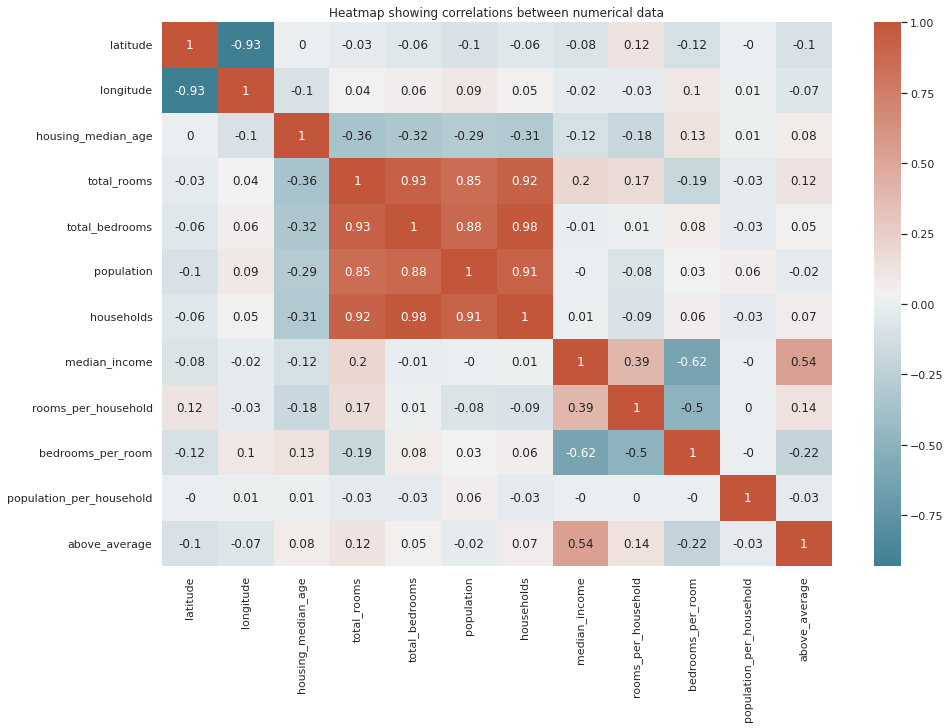

In [33]:
# sns plot for correlation matrix
plt.subplots(figsize=(15,10))
sns.heatmap(corrM, xticklabels=corrM.columns, yticklabels=corrM.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [34]:
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_mat = corrM.where(
    np.triu(np.ones(corrM.shape), k=1).astype(bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()
print(sorted_mat)

longitude          latitude              -0.93
bedrooms_per_room  median_income         -0.62
                   rooms_per_household   -0.50
total_rooms        housing_median_age    -0.36
total_bedrooms     housing_median_age    -0.32
                                          ... 
population         total_bedrooms         0.88
households         population             0.91
                   total_rooms            0.92
total_bedrooms     total_rooms            0.93
households         total_bedrooms         0.98
Length: 66, dtype: float64


In [35]:
# alternate way
df_train_numeric.corr().unstack().sort_values(ascending = False).head(25)

latitude                  latitude                    1.000000
longitude                 longitude                   1.000000
population_per_household  population_per_household    1.000000
bedrooms_per_room         bedrooms_per_room           1.000000
rooms_per_household       rooms_per_household         1.000000
median_income             median_income               1.000000
households                households                  1.000000
population                population                  1.000000
total_bedrooms            total_bedrooms              1.000000
total_rooms               total_rooms                 1.000000
housing_median_age        housing_median_age          1.000000
above_average             above_average               1.000000
households                total_bedrooms              0.979399
total_bedrooms            households                  0.979399
                          total_rooms                 0.931546
total_rooms               total_bedrooms              0

**Q2 answer: total_bedrooms and households**

### Question 3

* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using `round(score, 2)`

Options:
- 0.26
- 0
- 0.10
- 0.16

In [36]:
categorical = ['ocean_proximity']

def calculate_mi(series):
    return mutual_info_score(series, df_train['above_average'])

df_mi = df_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi = round(df_mi, 2)
df_mi

,MI
ocean_proximity,0.1


**Q3 Answer: 0.10**

### Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:
- 0.60
- 0.72
- 0.84
- 0.95

In [37]:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

In [38]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1h_ocean,3.922460,0.259714,3.754011
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,near_ocean,7.564516,0.130228,2.789082
2,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,inland,3.908012,0.234624,2.540059
3,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1h_ocean,5.201093,0.194158,2.059016
4,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,near_ocean,7.010127,0.139762,2.516456
...,...,...,...,...,...,...,...,...,...,...,...,...
12379,33.79,-118.29,16.0,1867.0,571.0,951.0,498.0,3.3427,<1h_ocean,3.748996,0.305838,1.909639
12380,38.04,-121.34,16.0,3295.0,565.0,2279.0,576.0,3.6083,inland,5.720486,0.171472,3.956597
12381,32.74,-116.99,18.0,3341.0,611.0,1952.0,602.0,3.9844,<1h_ocean,5.549834,0.182879,3.242525
12382,33.84,-117.87,16.0,1545.0,354.0,730.0,350.0,4.5112,<1h_ocean,4.414286,0.229126,2.085714


In [39]:
df_train.dtypes

latitude                    float64
longitude                   float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [40]:
df_train.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [41]:
numerical = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room',
       'population_per_household']

In [42]:
len(numerical)

11

# 1 hot encoding with DictVectorizer

In [43]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [44]:
train_dict[:1]

[{'ocean_proximity': '<1h_ocean',
  'latitude': 34.43,
  'longitude': -119.67,
  'housing_median_age': 39.0,
  'total_rooms': 1467.0,
  'total_bedrooms': 381.0,
  'population': 1404.0,
  'households': 374.0,
  'median_income': 2.3681,
  'rooms_per_household': 3.9224598930481283,
  'bedrooms_per_room': 0.25971370143149286,
  'population_per_household': 3.7540106951871657}]

## Model and training

In [45]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.84


In [46]:
model.intercept_[0]

-0.08540403389228242

In [47]:
model.coef_[0].round(3)

array([ 0.188,  0.004,  0.036,  0.106,  0.084,  1.214,  0.473, -1.705,
        0.019,  0.285,  0.842, -0.002,  0.011, -0.02 ,  0.002, -0.   ])

**Q4 Answer: 0.84**

In [48]:
# Predict on the test data

test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dict)

y_pred = model.predict(X_test)

accuracy = np.round(accuracy_score(y_test, y_pred),2)
print(accuracy)

# Score our model
print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))
print('Precision score: ', format(precision_score(y_test, y_pred)))
print('Recall score: ', format(recall_score(y_test, y_pred)))
print('F1 score: ', format(f1_score(y_test, y_pred)))

0.83
Accuracy score:  0.8323643410852714
Precision score:  0.8003754693366708
Recall score:  0.7742130750605327
F1 score:  0.7870769230769231


In [49]:
model.predict(X_test[:5])

array([0, 0, 1, 1, 0])

In [50]:
y_test[:5]

array([0, 0, 1, 1, 1])

In [51]:
model.predict(X_val[:10])

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [52]:
y_val[:10]

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `total_rooms`
   * `total_bedrooms` 
   * `population`
   * `households`

> **note**: the difference doesn't have to be positive

In [53]:
features = categorical + numerical
features

['ocean_proximity',
 'latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [54]:
len(features)

12

## Feature elimination

In [55]:
orig_score = accuracy


for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

ocean_proximity 0.03082364341085264 0.7991763565891473
latitude 0.005872093023255753 0.8241279069767442
longitude 0.01701550387596895 0.812984496124031
housing_median_age 0.033003875968992236 0.7969961240310077
total_rooms 0.0056298449612403045 0.8243701550387597
total_bedrooms 0.003934108527131719 0.8260658914728682
population 0.005145348837209296 0.8248546511627907
households 0.0003003875968992098 0.8296996124031008
median_income 0.07636627906976745 0.7536337209302325
rooms_per_household 0.023313953488372063 0.8066860465116279
bedrooms_per_room 0.02476744186046509 0.8052325581395349
population_per_household 0.0017538759689922356 0.8282461240310077


**Q5 answer: 'households'**

### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'median_house_value'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

Options:
- 0
- 0.01
- 0.1
- 1
- 10

## Linear regression

In [56]:
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,inland,5.045455,0.224625,2.560606
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,inland,6.114035,0.215208,3.122807
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,inland,5.205543,0.215173,2.325635
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,inland,5.329513,0.219892,2.123209


In [57]:
# Apply the logarithmic transformation to this column - 'median_house_value'
df['median_house_value'] = np.log1p(df['median_house_value'])

# split the dataset
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_train), len(df_val), len(df_test)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['median_house_value'].values
y_val = df_val['median_house_value'].values
y_test = df_test['median_house_value'].values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [58]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1h_ocean,3.922460,0.259714,3.754011
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,near_ocean,7.564516,0.130228,2.789082
2,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,inland,3.908012,0.234624,2.540059
3,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1h_ocean,5.201093,0.194158,2.059016
4,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,near_ocean,7.010127,0.139762,2.516456
...,...,...,...,...,...,...,...,...,...,...,...,...
12379,33.79,-118.29,16.0,1867.0,571.0,951.0,498.0,3.3427,<1h_ocean,3.748996,0.305838,1.909639
12380,38.04,-121.34,16.0,3295.0,565.0,2279.0,576.0,3.6083,inland,5.720486,0.171472,3.956597
12381,32.74,-116.99,18.0,3341.0,611.0,1952.0,602.0,3.9844,<1h_ocean,5.549834,0.182879,3.242525
12382,33.84,-117.87,16.0,1545.0,354.0,730.0,350.0,4.5112,<1h_ocean,4.414286,0.229126,2.085714


In [59]:
y_train

array([12.39421473, 13.12236738, 11.06821524, ..., 12.27979233,
       11.84223641, 12.10791391])

In [60]:
df_val

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,36.74,-119.85,35.0,1191.0,190.0,537.0,182.0,3.5375,inland,6.543956,0.159530,2.950549
1,41.02,-124.16,23.0,1672.0,385.0,1060.0,390.0,2.1726,near_ocean,4.287179,0.230263,2.717949
2,33.67,-117.92,14.0,6224.0,1679.0,3148.0,1589.0,4.2071,<1h_ocean,3.916929,0.269762,1.981120
3,34.15,-118.45,10.0,1091.0,260.0,517.0,266.0,4.1727,<1h_ocean,4.101504,0.238313,1.943609
4,33.63,-117.90,28.0,2370.0,352.0,832.0,347.0,7.1148,<1h_ocean,6.829971,0.148523,2.397695
...,...,...,...,...,...,...,...,...,...,...,...,...
4123,36.79,-119.77,27.0,2258.0,427.0,1076.0,423.0,2.9937,inland,5.338061,0.189105,2.543735
4124,37.58,-122.35,30.0,5039.0,1564.0,2129.0,1536.0,3.3469,near_ocean,3.280599,0.310379,1.386068
4125,37.34,-122.01,31.0,3080.0,526.0,1493.0,582.0,6.3052,<1h_ocean,5.292096,0.170779,2.565292
4126,33.67,-118.00,34.0,3712.0,667.0,1521.0,632.0,4.8125,<1h_ocean,5.873418,0.179688,2.406646


In [61]:
len(df_val), len(y_val)

(4128, 4128)

In [62]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
train_dict[:1]

[{'ocean_proximity': '<1h_ocean',
  'latitude': 34.43,
  'longitude': -119.67,
  'housing_median_age': 39.0,
  'total_rooms': 1467.0,
  'total_bedrooms': 381.0,
  'population': 1404.0,
  'households': 374.0,
  'median_income': 2.3681,
  'rooms_per_household': 3.9224598930481283,
  'bedrooms_per_room': 0.25971370143149286,
  'population_per_household': 3.7540106951871657}]

In [63]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [64]:
# model with various alpha values
for a in [0, 0.01, 0.1, 1, 10]:

    model_ridge = Ridge(alpha=a, solver="sag", random_state=42)
    #  Fit the model
    model_ridge.fit(X_train, y_train)

    # Predict on the val data
    y_pred = model_ridge.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 3))

0 0.524
0.01 0.524
0.1 0.524
1 0.524
10 0.524


**Q6 answer: 0**

In [69]:
 # Predict on the test data
y_pred = model_ridge.predict(X_test[[10]])
print(y_pred)

[12.16549776]


In [70]:
np.expm1(y_pred)

array([192046.45032281])

In [71]:
y_test[10]

11.72157244693173

In [72]:
np.expm1(y_test[10])

123199.9999999999